# 日経平均株価 週足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

code = 'N225'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00+09:00,27515.339844,27961.210938,27305.369141,27927.470703,303600000,0.0,0.0
2023-03-06 00:00:00+09:00,28182.310547,28734.789062,28118.740234,28143.970703,386300000,0.0,0.0
2023-03-13 00:00:00+09:00,27886.210938,27906.970703,26632.919922,27333.789062,517000000,0.0,0.0
2023-03-20 00:00:00+09:00,27253.730469,27520.970703,26945.669922,27385.250000,280900000,0.0,0.0
2023-03-27 00:00:00+09:00,27482.390625,28124.619141,27359.720703,28041.480469,380700000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39572.488281,589000000,0.0,0.0
2025-02-03 00:00:00+09:00,38932.660156,39192.511719,38401.820312,38787.019531,768100000,0.0,0.0
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,573400000,0.0,0.0


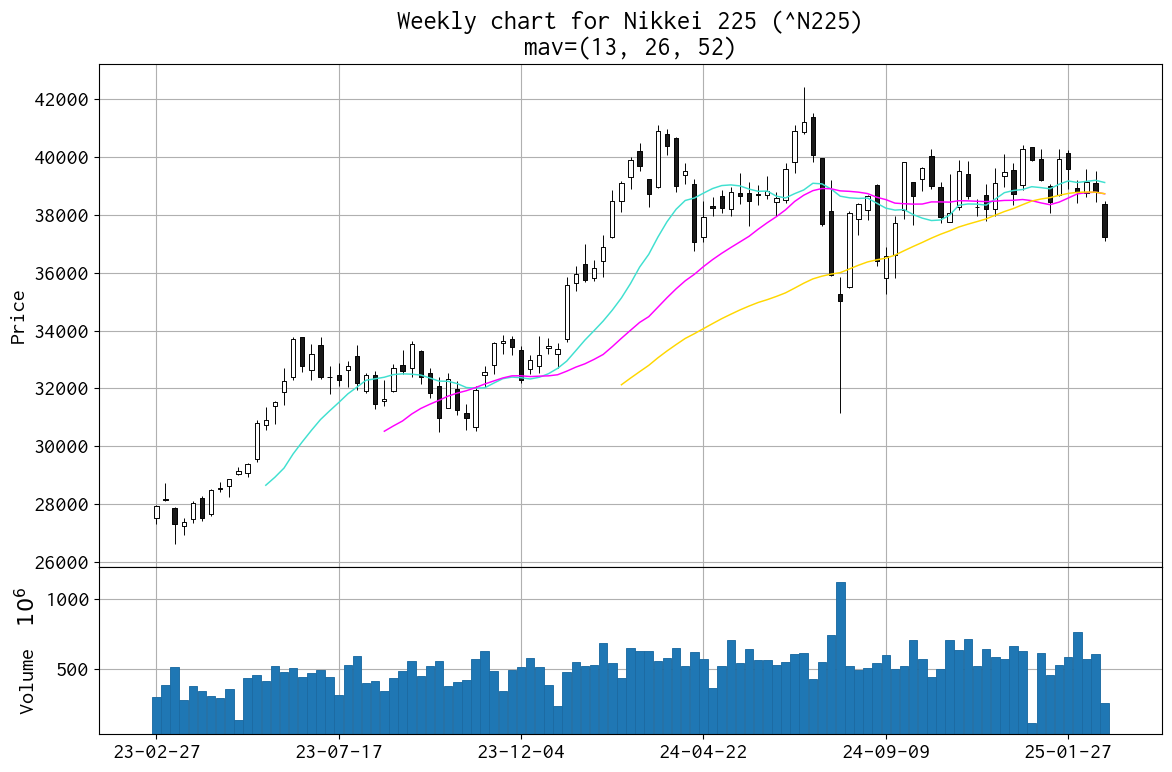

In [2]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()


mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))

plt.tight_layout()
plt.savefig('weekly_chart_%s.png' % code)
plt.show()

In [3]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0
2025-02-24 00:00:00+09:00,38359.671875,38485.949219,37084.441406,37216.410156,253700000,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00+09:00    38776.941406
2025-02-24 00:00:00+09:00    37216.410156
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00+09:00           NaN
2025-02-24 00:00:00+09:00   -1560.53125
Name: Close, dtype: float64

In [6]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00+09:00   -1143.261719
dtype: float64

In [7]:
df['Close'].rolling(13).mean().tail()

Date
2025-01-27 00:00:00+09:00    39170.823317
2025-02-03 00:00:00+09:00    39115.950120
2025-02-10 00:00:00+09:00    39154.913161
2025-02-17 00:00:00+09:00    39192.843149
2025-02-24 00:00:00+09:00    39116.564603
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(26).mean().tail()

Date
2025-01-27 00:00:00+09:00    38578.379207
2025-02-03 00:00:00+09:00    38723.072266
2025-02-10 00:00:00+09:00    38764.870643
2025-02-17 00:00:00+09:00    38780.742638
2025-02-24 00:00:00+09:00    38725.691106
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00+09:00    38738.726262
2025-02-03 00:00:00+09:00    38775.064678
2025-02-10 00:00:00+09:00    38787.799129
2025-02-17 00:00:00+09:00    38781.611854
2025-02-24 00:00:00+09:00    38729.796274
Name: Close, dtype: float64